In [66]:
import pandas as pd
import matplotlib.pyplot as plt

Question #1: Which neighborhoods do AirBnB guests in Seattle prefer?

To answer this we will look at the mean and median prices for AirBnB listings in various Seattle neighborhoods.

In [67]:
#Read in Seattle AirBnB listings data
df = pd.read_csv('listings.csv')

#Convert price column to numerical
df['price'] = pd.to_numeric(df['price'].str.replace('$','').str.replace(',',''))

C:\Users\Hashim\AppData\Local\Temp\ipykernel_13576\630776812.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = pd.to_numeric(df['price'].str.replace('$','').str.replace(',',''))


In [68]:
#Get mean and median price by neighborhood
price_mean_by_n = df.groupby(['neighbourhood_group_cleansed'])['price'].mean()
price_median_by_n = df.groupby(['neighbourhood_group_cleansed'])['price'].median()

In [69]:
#Create dataframe of mean and median prices by neighborhood
price_by_n = pd.concat([price_mean_by_n, price_median_by_n], axis=1)
price_by_n.columns = ['Mean','Median']
price_by_n = price_by_n.sort_values(by='Median', ascending=False)

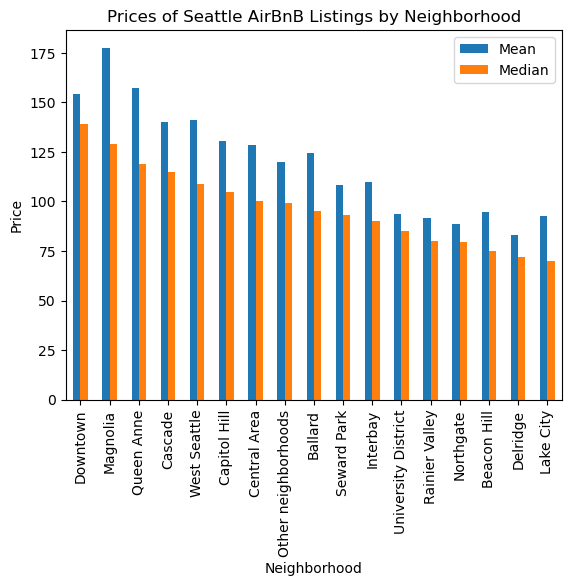

<Figure size 640x480 with 0 Axes>

In [70]:
#Plot
price_by_n.plot(kind="bar")
plt.title("Prices of Seattle AirBnB Listings by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Price")
plt.figure().clear()

Question #2: What are the top factors that impact the overall review score of a listing?

To answer this question, we create a correlation matrix of all the variables in the dataset. From this matrix, we can isolate just the overall review score variable and then rank the remaining variables to determine which have the largest impact on overall revie score.

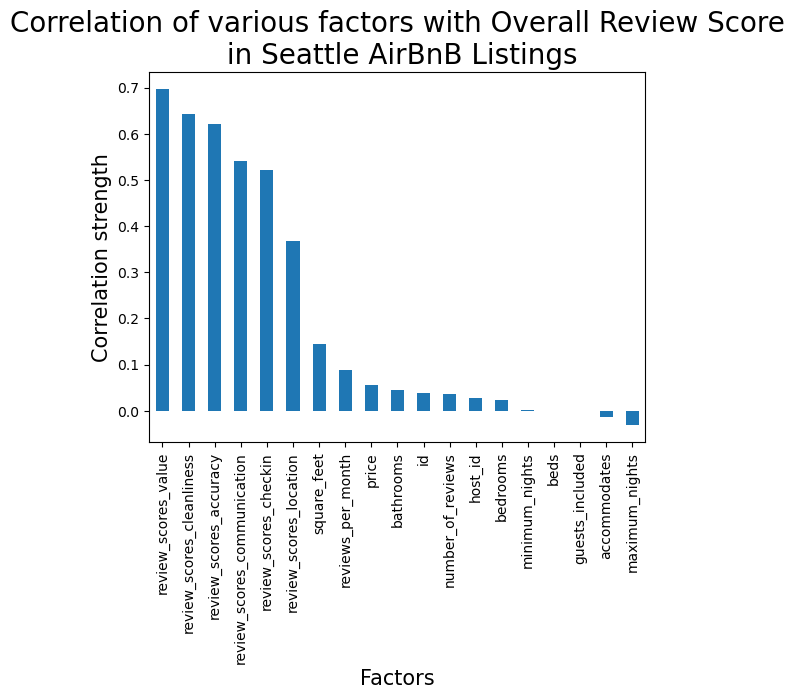

<Figure size 640x480 with 0 Axes>

In [71]:
#correlation matrix, isolate for overall review score
cor = df.corr()['review_scores_rating'].sort_values(ascending=False)[1:20]

#Plot as bar chart
cor.plot(kind = 'bar')
plt.xlabel("Factors",  size = 15)
plt.ylabel("Correlation strength", size = 15)
plt.title("Correlation of various factors with Overall Review Score\n in Seattle AirBnB Listings", size = 20)
plt.figure().clear()

Question #3: Which amenities are associated with higher listing prices?

In order to answer this question we will create a correlation matrix to determine the strength of the relation of various amenities to the price. However, in the dataset there is a single column for amenities in which the amenities are listed out for each property. To work around this, we will convert this column of lists to dummy columns for each amenity where the value of that amenity will be 1 if the property has it and 0 otherwise.

In [72]:
def lists_to_columns(amenities):
    """Convert a column of lists of amenities to a dataframe with dummy columns for each item

    Args:
        amenities (list): list in which each element of the list is a list of amenities for one AirBnB property

    Returns:
        Dataframe: dataframe with dummy variables for 
    """
    master_str = ''
    for i, listing in enumerate(amenities):
        listing = listing.replace('"','').replace('{',',').replace('}','')
        master_str = master_str + listing
        amenities[i] = listing[1:]
    master_set = list(set(master_str.split(',')[1:]))[1:]
    
    df_amen_data = []
    for i, listing in enumerate(amenities):
        new_row = []
        for x, amen in enumerate(master_set):
            if amen in listing:
                new_row.append(1)
            else:
                new_row.append(0)
        df_amen_data.append(new_row)
    return pd.DataFrame(df_amen_data, columns = master_set)

In [73]:
#Create a new dataframe with a dummy column for each amenity, then combine new df with existing dataframe
df_amen = lists_to_columns(list(df['amenities']))
df_final = pd.concat([df, df_amen], axis=1)

In [74]:
#Create correlation matrix of new dataframe and isolate price column
cor_final = df_final.corr()['price'].sort_values(ascending=False)[1:20]

Text(0.5, 1.0, 'Correlation of various factors with Price\n of Seattle AirBnB Listings')

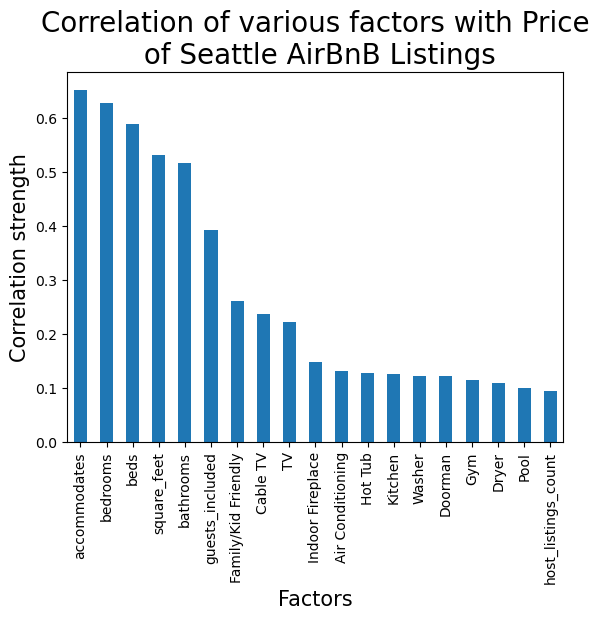

In [75]:
#Plot
cor_final.plot(kind = 'bar')
plt.xlabel("Factors",  size = 15)
plt.ylabel("Correlation strength", size = 15)
plt.title("Correlation of various factors with Price\n of Seattle AirBnB Listings", size = 20)